In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [19]:
data = pd.read_csv('./gini_per_capita_full.csv')
X_data = data['Year']
X_data = np.reshape(X_data,(-1,1))
y_data = data['GNI per capita']
# y_data = np.reshape(y_data,(-1,1))
print(X_data[0:2], y_data[0:2])

[[1990]
 [1991]] 0    830
1    890
Name: GNI per capita, dtype: int64


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data,train_size=0.8,random_state=42)
(X_train.shape, y_train.shape),(X_test.shape,y_test.shape)

(((26, 1), (26,)), ((7, 1), (7,)))

In [21]:
from sklearn.neural_network import MLPRegressor
NN_Regression = MLPRegressor(hidden_layer_sizes=[100,50],activation='relu',solver='adam',alpha=0.001,random_state=42, max_iter=5000000).fit(X_train, y_train.values.ravel())

In [22]:
nn_pred = NN_Regression.predict(X_test)

In [23]:
mse = mean_squared_error(y_test,nn_pred)
print(mse)

1032452.5299690046


In [24]:
def plot_data(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training Data")
    plt.scatter(test_data,test_labels,c='g',s=4,label="Test Data")    
    
    if predictions is not None:
        plt.scatter(test_data,predictions, c='r', s=4, label="Predictions")
        
    plt.legend(prop={"size":14});
    

(26, 1) (26,)


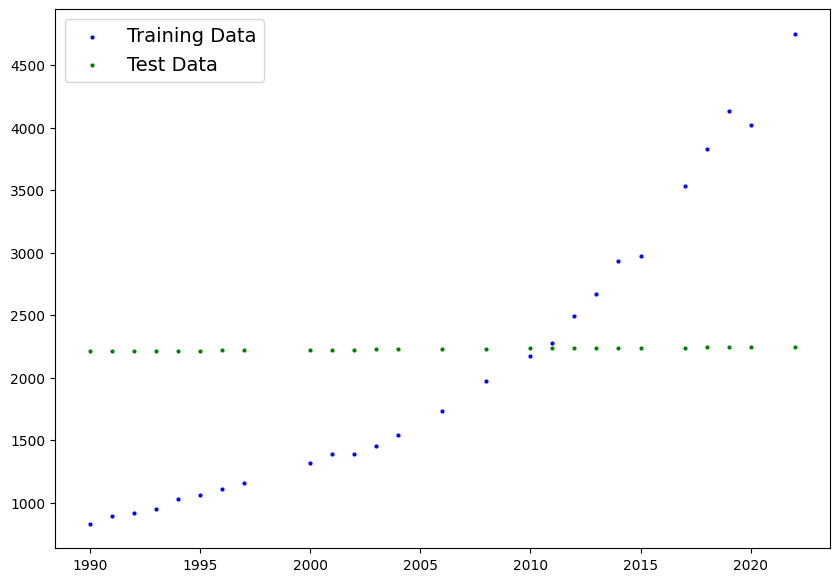

In [25]:
all_pred_data = NN_Regression.predict(X_train)
print(X_train.shape, all_pred_data.shape)
plot_data(train_data=X_train, train_labels=y_train, test_data=X_train,test_labels=all_pred_data)